# MCMC (Metropolis-Hesting) on Supernova-la dataset

# Cosmology with Supernovae Ia:  theory









*   The flux of supernova of luminosity L is given by         $f = \frac{L}{4\pi {D_L}^2}$,  Where $D_L$ is the *Luminosity distance*.



*   $D_L$ as a function of *redshift* Z $D_L=\frac{(1+z)c}{H_0\sqrt{\mid{1-\Omega}\mid}}S_k(r)$


 
 
 *   Where $r(z) =\sqrt{\mid{1-\Omega}\mid} \int_0^z\frac{dz'}{\sqrt{\Omega_m(1+z')^3+\Omega_v+(1-\Omega)(1+z')^2}}$ , $S_k(r)$ = Sin r , r, Sinh r depending upon , $\Omega$ > 1, =1, <1, here $\Omega \equiv\Omega_m +\Omega_v$
 
 
 
 
 
 *   For flat universe $\Omega =1$, $D_L(z) = 3000h^{-1}(1+z)\int_0^z \frac{dz'}{\sqrt{\Omega_m(1+z')^3+1-\Omega_m}}$Mpc, Where $H_0 =100.h Km S^{-1}Mpc^{-1}$
 
 
  
  
  
 *   For flat only universe , another way is to use fitting formula without any integration $D_L(z)= \frac{c}{H_0}(1+z)[\eta(1,\Omega_m) - \eta(\frac{1}{1+z},\Omega_m)]$
 
 
 
 
 
  *  Where ,    $\eta(a,\Omega_m) = 2\sqrt{s^3 +1}[\frac{1}{a^4}-0.1540\frac{s}{a^3}+0.4304\frac{s^2}{a^2}+0.19097\frac{s^3}{a}+0.066941\frac{s^4}{a^0}]^{-1/8}$ , and $s^3 \equiv \frac{(1-\Omega_m)}{\Omega_m}$ ,has accurecy of 0.4% for $0.2\leq \Omega_m \leq 1$
 
 
 
 
  *   Fluxes  are  usually  expressed  in  magnitudes,  where $ m=−2.5 log_{10}F+constant$.   The distance modulus is $\mu = m−M$, where M is the absolute magnitude, which is the value of m if the source is at a distance 10pc:
 
 
 
 
 
  * $\mu =25 - 5log_{10}h +5log_{10}(\frac{D_L*}{Mpc})$ , The Hubble constant has been factored out of $D_L:D_L*\equiv D_L(h= 1)$.
 If  we  have  measurements  of $\mu$,  then  we  can  use  Bayesian  arguments  to  estimate  the parameters $\Omega_m,\Omega_v, h$.

# Model 

#### defining  $\eta$ :
  $\eta(a,\Omega_m) = 2\sqrt{s^3 +1}[\frac{1}{a^4}-0.1540\frac{s}{a^3}+0.4304\frac{s^2}{a^2}+0.19097\frac{s^3}{a}+0.066941\frac{s^4}{a^0}]^{-1/8}$ , where $s^3 \equiv \frac{(1-\Omega_m)}{\Omega_m}$

#### defining the function for luminosity distance $D_l$ :

$D_L(z)= \frac{c}{H_0}(1+z)[\eta(1,\Omega_m) - \eta(\frac{1}{1+z},\Omega_m)]$

#### cleverly we have modified this function coefficent as 3000.(1+z) as we are choosing $D_L*$, $h\equiv 1$

$D_L*(z)= 3000.0.(1+z)[\eta(1,\Omega_m) - \eta(\frac{1}{1+z},\Omega_m)]$
 


#### function for distance modulus $\mu$ :

 $\mu =25 - 5log_{10}h +5log_{10}(\frac{D_L*}{Mpc})$


### Above was the model for which we have to find out the best fit parameters values for $\Omega_m$ and $h$ using bayesian methods.

# Baye's theorem : $P(\theta|D) = \frac{P(\theta).P(D|\theta)}{\Sigma  P(D)}$
#### where $\theta's$ are the parameter , $D$ is the data

#### * $P(\theta|D)$ is called 'Posterior Probability'.
#### * $P(\theta)$ is called 'Prior'.
#### * $P(D|\theta)$ is the 'Likelyhood'.
#### * $\Sigma  P(D)$ is our 'Normalization constant'.



* Here, in this problem we have chosen a "flat prior", which means that the distribution of posterior does not depends on the prior's distribution.
* Also, We have a stationary model. So We don't need to bother about the "Normalizing term" as well.
* In this case, the baye's formula can replaced into :
# $P(\theta|D) \propto P(D|\theta)$





# MH algorithm:

* looping from (1,N=10000)

#### In Marcov's chain parts we basically do like this:

* Next values of parameters are chosen from a normal distribution centered around the previous values of parameter with some standard deviation $\sigma$(here 0.01).

##### next,

* we calculate the log likelyhood for the new randomly generated parameter values.


* if next value of likelyhood is grater than previous 'or' ratio of likelyhoods is greater than random uniform (0,1). Then accept the parameter values, else repeat the previous step.





In [12]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pylab as pl 
from func import*
from cycler import cycle
#import Image
import matplotlib.ticker as mticker
#from constants import*
import math
c = 3.0 * (10.0**5.0)
Ho = 100.0
#h = 0.7





In [13]:
n_sample = 10000

s_d = [0.01,0.01]

n_super = 31

param_val = np.empty([n_sample,3])

D_mu = np.empty(n_super)

param_val[0,:] = [np.random.uniform(), np.random.uniform(), 10**(-100)]

cov_mat = np.loadtxt('jla_mub_covmatrix.txt')

cov_mat = np.reshape(cov_mat,(n_super,n_super))

cov_Inv = np.linalg.inv(cov_mat)

Analytical_mU = np.empty(n_super)

Data = np.loadtxt('jla_mub_0.txt')

Z = Data[:,0]
m_u = Data[:,1]



def mu_analytical(om_ga,h,z):

    def A(z):
        return (1.0)/(1+z)
    #a = (1.0)/(1+z)


    def S(om_ga):
        return (np.power((1.0-om_ga)/om_ga,1.0/3.0))
    #s = ((1-om_ga)/om_ga)**(1.0/3.0)


    def eta(a,s):
        f_t = 2.0*np.power((np.power(s,3.0)+1.0),1.0/2.0)
        s_d = 1.0/np.power(a,4.0)
        t_d = 0.1540*(s/(np.power(a,3.0)))		
        f_h = 0.4304*((np.power(s,2.0))/(np.power(a,2.0)))
        f_v = 0.19097*((np.power(s,3.0))/(a))
        s_h = 0.066941 * np.power(s,4.0)

        part = np.power((s_d - t_d + f_h + f_v + s_h),(-1.0/8.0)) 

        e_ta = f_t*part
        return e_ta


    def delf(a,om_ga,z):
        return (c/Ho) * (1.0+z) * (eta(1.0,S(om_ga)) - eta(A(z),S(om_ga)))

    #S = S(om_ga)

    #del_f = c/Ho * (1+z) * ((eta(1,om_ga) - eta(a,om_ga)))
    
    def Mu(h,del_f):
        mu = 25.0-5.0*np.log10(h)+5.0*np.log10(del_f)
        return mu


    a = A(z)
    s = S(om_ga)
    Et_a = eta(a,s)
    del_f = delf(a,om_ga,z)
    M_u = Mu(h,del_f)

    return Mu(h,del_f)



pl.figure(figsize=(16.0,9.0))


def loglikehood(om_ga,h):
    if(om_ga<=0 or h<= 0):
        Log_Like = 10**(-100)
    else :
        for k in range (n_super):
            #print(Z)
            Analytical_mU[k] = mu_analytical(om_ga,h,Z[k])
            #print(len(Analytical_mU))
            D_mu[k] = m_u[k] - Analytical_mU[k]
            #print(D_mu)

        Log_Like = -0.5*np.dot(D_mu,np.dot(cov_Inv,D_mu))
#print(Log_Like)
    return Log_Like

param_val[0,2] = loglikehood(param_val[0,0],param_val[0,1])

for i in range (1,n_sample):
    L_Like1 = param_val[i-1,2]
    om_ga_1 = np.random.normal(param_val[i-1,0],s_d[0])
    h_1 = np.random.normal(param_val[i-1,1],s_d[1])

    #print(i,len(Z))
    L_like2 = loglikehood(om_ga_1,h_1)


    if(L_like2 > L_Like1):
        param_val[i,0] = om_ga_1
        param_val[i,1] = h_1
        param_val[i,2] = L_like2
    else:
        A = np.random.uniform()
        if(L_like2-L_Like1>np.log(A)):
            param_val[i,0] = om_ga_1
            param_val[i,1] = h_1
            param_val[i,2] = L_like2
        else:
            param_val[i,0] = param_val[i-1,0]
            param_val[i,1] = param_val[i-1,1]
            param_val[i,2] = L_Like1


<Figure size 1152x648 with 0 Axes>

## Burn-in :

* chopping of initial  ~ 10% values of the parameters from the chain.

In [14]:
N2 = int(m.floor(n_sample/10)) 

## Plotting

No handles with labels found to put in legend.


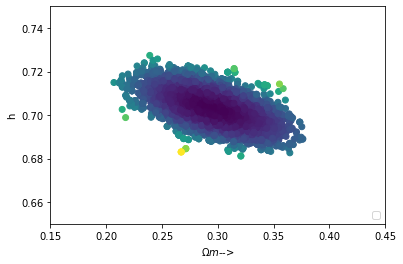

No handles with labels found to put in legend.


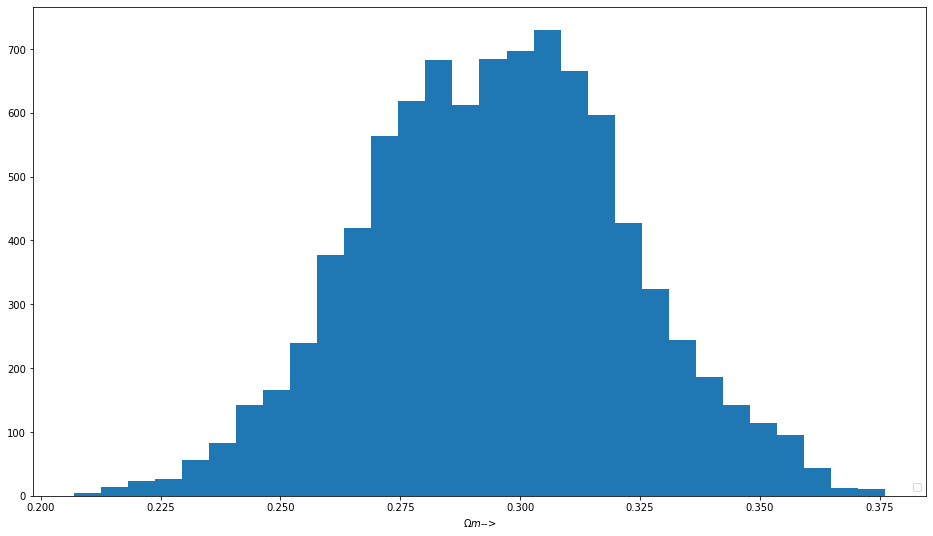

In [15]:

pl.scatter(param_val[N2:,0],param_val[N2:,1],c= -param_val[N2:,2])     
pl.xlim(0.15,0.45)
pl.ylim(0.65,0.75)
pl.xlabel("$\Omega m$-->")
pl.ylabel("h")
#pl.grid()
pl.legend(loc=4)
pl.savefig('Astrostats_4.png')

pl.show() 

pl.figure(figsize=(16.0,9.0))
pl.hist(param_val[N2:,0],bins=30)                              
pl.xlabel("$\Omega m$-->")
pl.legend(loc=4)
pl.savefig('Astrostats_5.png')

pl.show()











#plt.xlabel('z')
#plt.ylabel('Mu')
#plt.title('Z v/s Mu')
#plt.legend()
#plt.legend()
#plt.grid()
#plt.show()